In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Load dataset 
train_data = pd.read_csv('/Users/kritikansal/Desktop/SUBJECTS/CIS 508/FraudDetection/Fraud_train.csv')
test_data = pd.read_csv('/Users/kritikansal/Desktop/SUBJECTS/CIS 508/FraudDetection/Fraud_test.csv')

In [2]:
train_data.shape, test_data.shape

((2999, 32), (12918, 32))

In [3]:
#Explore data
train_data.tail() #Display last few rows of data

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,AGE,FAULT,POLICYTYPE,VEHICLECATEGORY,VEHICLEPRICE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS_POLICY_ACCIDENT,DAYS_POLICY_CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
2994,Apr,2,Monday,Pontiac,Rural,Monday,Apr,2,Male,Married,45,Third_Party,Sedan-Liability,Sport,20000_to_29000,1,400,3,more_than_30,more_than_30,1,7_years,36_to_40,No,No,External,none,no_change,1-vehicle,1996,Liability,No
2995,Nov,4,Thursday,Honda,Urban,Friday,Nov,4,Male,Married,35,Policy_Holder,Sedan-Liability,Sport,30000_to_39000,9,400,4,more_than_30,more_than_30,more_than_4,6_years,31_to_35,No,No,External,none,no_change,1-vehicle,1996,Liability,No
2996,Dec,4,Sunday,Chevrolet,Urban,Wednesday,Jan,1,Male,Married,69,Third_Party,Sedan-Liability,Sport,20000_to_29000,7,400,1,more_than_30,more_than_30,2_to_4,7_years,over_65,No,No,External,none,no_change,1-vehicle,1996,Liability,No
2997,Apr,1,Monday,Toyota,Urban,Tuesday,Apr,1,Male,Married,33,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,10,400,1,more_than_30,more_than_30,2_to_4,6_years,31_to_35,No,No,External,none,no_change,1-vehicle,1996,All_Perils,No
2998,Jun,4,Friday,Pontiac,Urban,Wednesday,Jul,1,Male,Single,30,Policy_Holder,Sedan-All_Perils,Sedan,20000_to_29000,8,400,2,more_than_30,more_than_30,none,7_years,31_to_35,No,No,External,3_to_5,no_change,1-vehicle,1996,All_Perils,No


In [4]:
#List of categorical features
categoricalFeatures1 = ["MONTH","DAYOFWEEK", "MAKE", "ACCIDENTAREA", "DAYOFWEEKCLAIMED", "MONTHCLAIMED",
"SEX", "MARITALSTATUS","FAULT", "POLICYTYPE","VEHICLECATEGORY","VEHICLEPRICE", 
"DAYS_POLICY_ACCIDENT","DAYS_POLICY_CLAIM","PASTNUMBEROFCLAIMS","AGEOFVEHICLE",
"AGEOFPOLICYHOLDER","AGENTTYPE", "ADDRESSCHANGE_CLAIM", "NUMBEROFCARS","BASEPOLICY","NUMBEROFSUPPLIMENTS", "POLICEREPORTFILED", "WITNESSPRESENT"]

In [5]:
train_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [6]:
#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([train_data,test_data], keys=[0,1])

#Do one Hot encoding for categorical features
combined_Data = pd.get_dummies(combined_Data,columns = categoricalFeatures1)

#Separate Train data and test data
train_data = combined_Data.xs(0)
test_data = combined_Data.xs(1)

In [7]:
#Disturibution and outliers
train_data.describe()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,2.781260,2.671224,40.055352,8.511837,407.302434,2.496832,1995.114038
std,1.286055,1.261614,13.497026,4.601437,41.847258,1.118365,0.606007
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,4.000000,400.000000,1.000000,1995.000000
50%,3.000000,3.000000,38.000000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.000000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [8]:
train_data['FRAUDFOUND'].value_counts() #check class balance

FRAUDFOUND
No     2600
Yes     399
Name: count, dtype: int64

In [9]:
#The data is seems to be imbalanced

In [10]:
#Preprocessing data
#Finding missing values
missing_values = train_data.isna().sum()
missing_values[missing_values > 0] #no missing values for the dataset

Series([], dtype: int64)

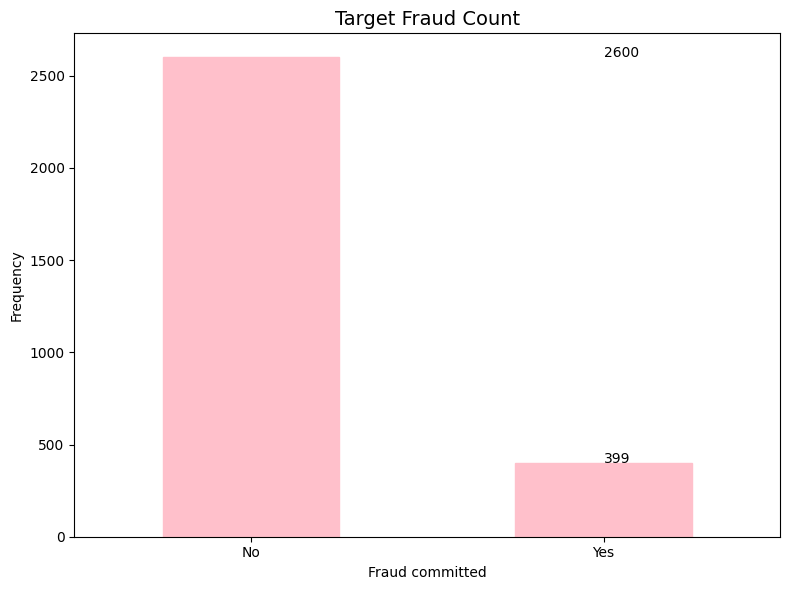

In [11]:
#Plotting bar chart of the 'target variable'
plt.figure(figsize = (8,6))
v_count = train_data['FRAUDFOUND'].value_counts().sort_index()
bar = v_count.plot(kind = 'bar', color = 'pink', edgecolor = 'pink')

for i, count in enumerate(v_count):
    bar.text(x = 1, y = count, s = str(count))
    
plt.title('Target Fraud Count', fontsize = 14, ha = 'center')
plt.xlabel('Fraud committed', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

#This shows that the dataset is imbalanced and count for unsatisified customer is much lower than satisfied customer

In [12]:
#Seprating dataclass
majority_class = train_data[train_data['FRAUDFOUND'] == 'No']
minority_class = train_data[train_data['FRAUDFOUND'] == 'Yes']

In [13]:
# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

In [14]:
# Combine the downsampled majority class and the minority class
balanced_train_data = pd.concat([majority_downsampled, minority_class])

In [15]:
#Mix rows
balanced_train_data = balanced_train_data.sample(frac=1, random_state=43).reset_index(drop=True)

In [16]:
#Describe data
balanced_train_data.tail()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,FRAUDFOUND,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAYOFWEEK_Friday,DAYOFWEEK_Monday,DAYOFWEEK_Saturday,DAYOFWEEK_Sunday,DAYOFWEEK_Thursday,DAYOFWEEK_Tuesday,DAYOFWEEK_Wednesday,MAKE_Accura,MAKE_BMW,MAKE_Chevrolet,MAKE_Dodge,MAKE_Ferrari,MAKE_Ford,MAKE_Honda,MAKE_Jaguar,MAKE_Lexus,MAKE_Mazda,MAKE_Mecedes,MAKE_Mercury,MAKE_Nisson,MAKE_Pontiac,MAKE_Porche,MAKE_Saab,MAKE_Saturn,MAKE_Toyota,MAKE_VW,ACCIDENTAREA_Rural,ACCIDENTAREA_Urban,DAYOFWEEKCLAIMED_Friday,DAYOFWEEKCLAIMED_Monday,DAYOFWEEKCLAIMED_Saturday,DAYOFWEEKCLAIMED_Sunday,DAYOFWEEKCLAIMED_Thursday,DAYOFWEEKCLAIMED_Tuesday,DAYOFWEEKCLAIMED_Wednesday,MONTHCLAIMED_Apr,MONTHCLAIMED_Aug,MONTHCLAIMED_Dec,MONTHCLAIMED_Feb,MONTHCLAIMED_Jan,MONTHCLAIMED_Jul,MONTHCLAIMED_Jun,MONTHCLAIMED_Mar,MONTHCLAIMED_May,MONTHCLAIMED_Nov,MONTHCLAIMED_Oct,MONTHCLAIMED_Sep,SEX_Female,SEX_Male,MARITALSTATUS_Divorced,MARITALSTATUS_Married,MARITALSTATUS_Single,MARITALSTATUS_Widow,FAULT_Policy_Holder,FAULT_Third_Party,POLICYTYPE_Sedan-All_Perils,POLICYTYPE_Sedan-Collision,POLICYTYPE_Sedan-Liability,POLICYTYPE_Sport-All_Perils,POLICYTYPE_Sport-Collision,POLICYTYPE_Sport-Liability,POLICYTYPE_Utility-All_Perils,POLICYTYPE_Utility-Collision,POLICYTYPE_Utility-Liability,VEHICLECATEGORY_Sedan,VEHICLECATEGORY_Sport,VEHICLECATEGORY_Utility,VEHICLEPRICE_20000_to_29000,VEHICLEPRICE_30000_to_39000,VEHICLEPRICE_40000_to_59000,VEHICLEPRICE_60000_to_69000,VEHICLEPRICE_less_than_20000,VEHICLEPRICE_more_than_69000,DAYS_POLICY_ACCIDENT_15_to_30,DAYS_POLICY_ACCIDENT_1_to_7,DAYS_POLICY_ACCIDENT_8_to_15,DAYS_POLICY_ACCIDENT_more_than_30,DAYS_POLICY_ACCIDENT_none,DAYS_POLICY_CLAIM_15_to_30,DAYS_POLICY_CLAIM_8_to_15,DAYS_POLICY_CLAIM_more_than_30,PASTNUMBEROFCLAIMS_1,PASTNUMBEROFCLAIMS_2_to_4,PASTNUMBEROFCLAIMS_more_than_4,PASTNUMBEROFCLAIMS_none,AGEOFVEHICLE_2_years,AGEOFVEHICLE_3_years,AGEOFVEHICLE_4_years,AGEOFVEHICLE_5_years,AGEOFVEHICLE_6_years,AGEOFVEHICLE_7_years,AGEOFVEHICLE_more_than_7,AGEOFVEHICLE_new,AGEOFPOLICYHOLDER_16_to_17,AGEOFPOLICYHOLDER_18_to_20,AGEOFPOLICYHOLDER_21_to_25,AGEOFPOLICYHOLDER_26_to_30,AGEOFPOLICYHOLDER_31_to_35,AGEOFPOLICYHOLDER_36_to_40,AGEOFPOLICYHOLDER_41_to_50,AGEOFPOLICYHOLDER_51_to_65,AGEOFPOLICYHOLDER_over_65,AGENTTYPE_External,AGENTTYPE_Internal,ADDRESSCHANGE_CLAIM_1_year,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,NUMBEROFCARS_more_than_8,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability,NUMBEROFSUPPLIMENTS_1_to_2,NUMBEROFSUPPLIMENTS_3_to_5,NUMBEROFSUPPLIMENTS_more_than_5,NUMBEROFSUPPLIMENTS_none,POLICEREPORTFILED_No,POLICEREPORTFILED_Yes,WITNESSPRESENT_No,WITNESSPRESENT_Yes
793,2,2,34,16,400,4,1995,No,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
794,2,2,0,9,400,3,1995,No,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,F

In [17]:
balanced_train_data.shape

(798, 145)

In [18]:
X_balanced = balanced_train_data.drop('FRAUDFOUND', axis = 1)
y_balanced = balanced_train_data['FRAUDFOUND']

In [19]:
# Split the data into training and validation sets                                    
X_balanced_train, X_balanced_val, y_balanced_train, y_balanced_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [20]:
#Choose random forest Model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
rf_model.fit(X_balanced_train, y_balanced_train)

RandomForestClassifier(random_state=42)